In [1]:
# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load 2 data sets
app_rec = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\application_record.csv')

cre_rec = pd.read_csv(r'C:\Users\shaha\OneDrive\Documents\credit_score\credit_record.csv')

# Data Exploration

In [3]:
# Check the size of each data set
print(app_rec.shape)
print(cre_rec.shape)

(438557, 18)
(1048575, 3)


In [4]:
app_rec.columns.to_list()

['ID',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS']

In [5]:
app_rec.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [6]:
app_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']


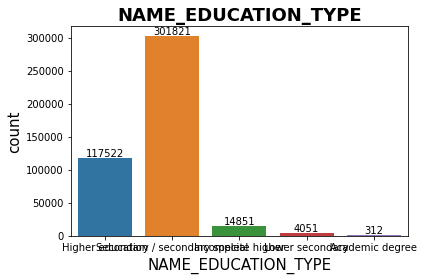

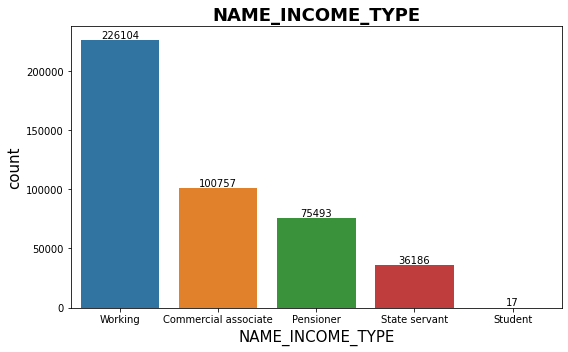

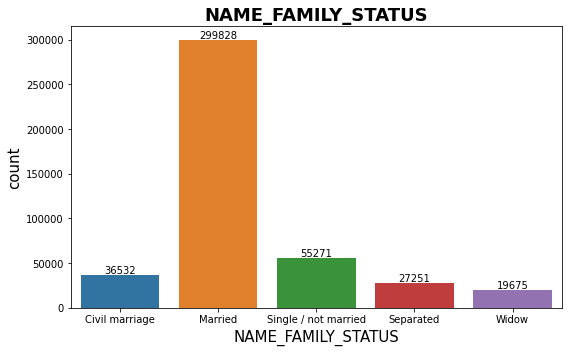

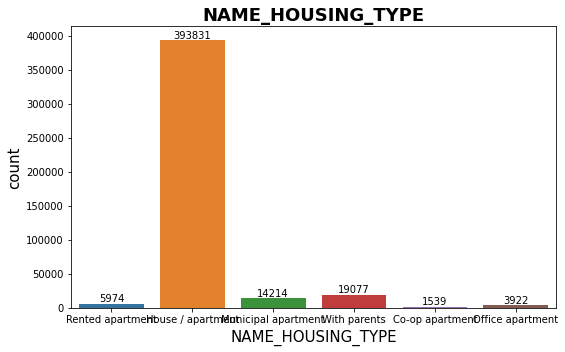

In [7]:
# Create code for object data type fields:
   # 'NAME_INCOME_TYPE',  'NAME_EDUCATION_TYPE',  'NAME_FAMILY_STATUS',  'NAME_HOUSING_TYPE'

print(app_rec.NAME_INCOME_TYPE.unique())
print(app_rec.NAME_EDUCATION_TYPE.unique())
print(app_rec.NAME_FAMILY_STATUS.unique())
print(app_rec.NAME_HOUSING_TYPE.unique())

# Create a for loop for visualization of frequency of items in each aforementioned columns
for var in ['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE',   'NAME_FAMILY_STATUS',  'NAME_HOUSING_TYPE']:
    # countplt, ax = plt.subplots(figsize = (10,7))
    plt.rcParams["figure.figsize"] = [8, 5]
    plt.rcParams["figure.autolayout"] = True
    ax = sns.countplot(x =var, data = app_rec)
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    ax.bar_label(ax.containers[0])
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.show()

In [8]:
# It Seems we have imbalanced data. What will be the next step to address this situation and avoid consequential issues? Question from Saeed: What should I do in this situation?

In [9]:
#Check the Numeric fields
app_rec.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
CNT_CHILDREN,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,438557.0,1.875243e+05,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0
DAYS_BIRTH,438557.0,-1.599790e+04,4185.030007,-25201.0,-19483.0,-15630.0,-12514.0,-7489.0
DAYS_EMPLOYED,438557.0,6.056368e+04,138767.799647,-17531.0,-3103.0,-1467.0,-371.0,365243.0
FLAG_MOBIL,438557.0,1.000000e+00,0.000000,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,438557.0,2.061328e-01,0.404527,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,438557.0,2.877710e-01,0.452724,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,438557.0,1.082071e-01,0.310642,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


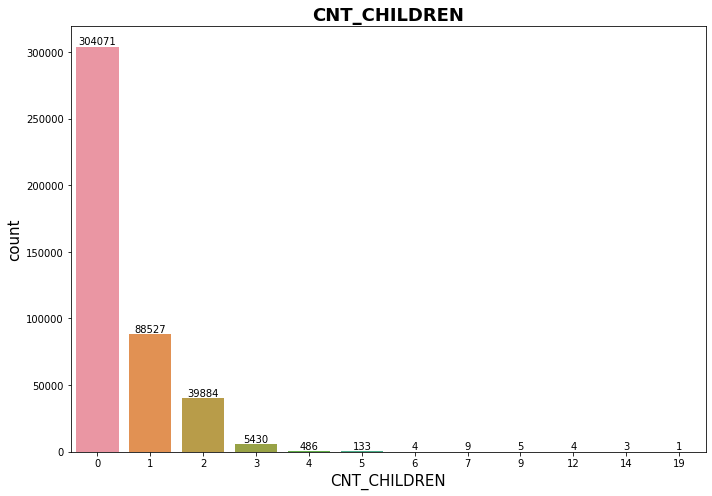

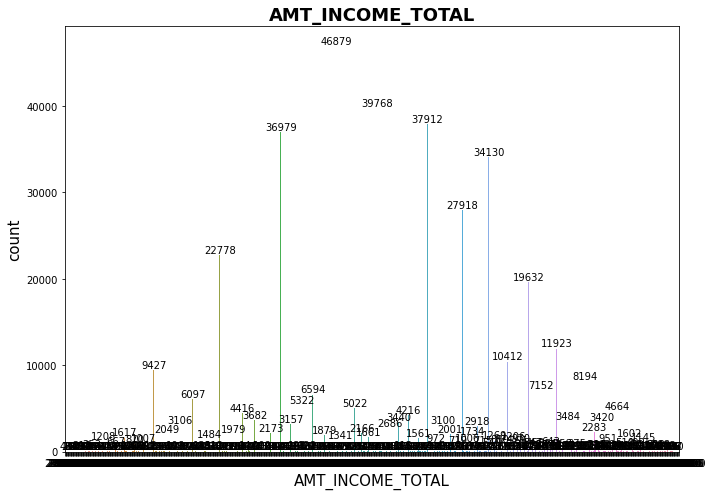

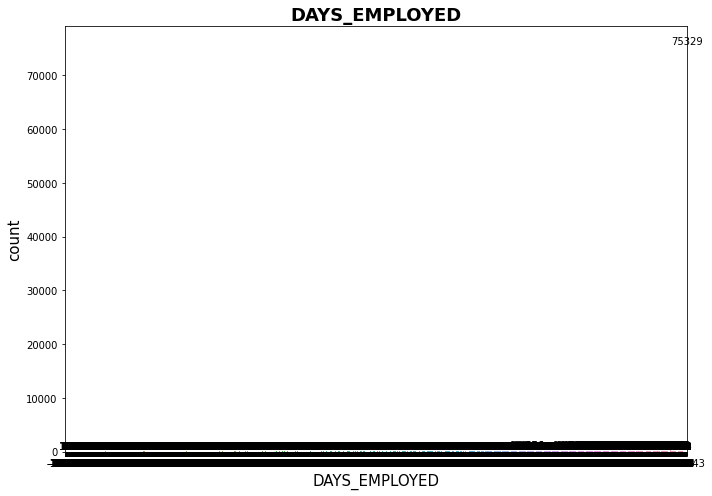

In [10]:
for var in ['CNT_CHILDREN',  'AMT_INCOME_TOTAL',  'DAYS_EMPLOYED']:
    # countplt, ax = plt.subplots(figsize = (10,7))
    plt.rcParams["figure.figsize"] = [10, 7]
    plt.rcParams["figure.autolayout"] = True
    ax =  sns.countplot(x=var, data = app_rec)
    ax.set_title(var,fontsize = 18, fontweight='bold' )
    ax.bar_label(ax.containers[0])
    ax.set_xlabel(var, fontsize = 15)
    ax.set_ylabel('count', fontsize = 15)
    plt.show()

# My Graphs does not work correctly. Question from Saee: WHat I should do for th barplot?

Text(0, 0.5, 'Frequency')

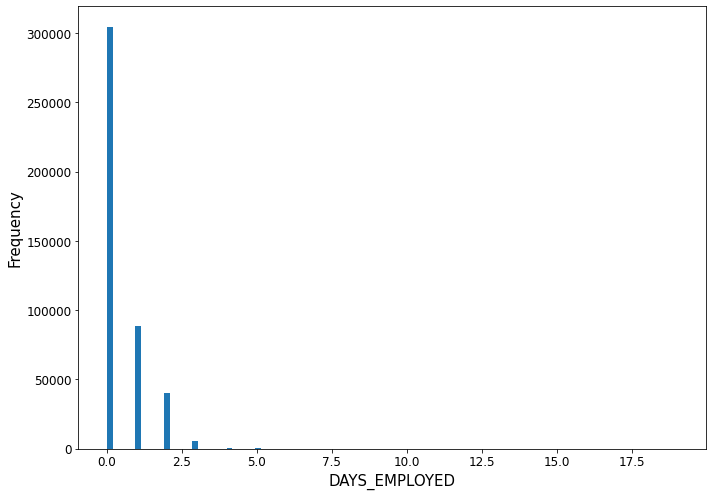

In [11]:
app_rec['CNT_CHILDREN'].hist(bins=100, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("DAYS_EMPLOYED", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

<AxesSubplot:>

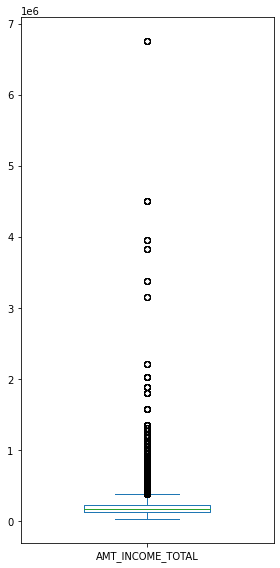

In [12]:
# Visualize the data range in "AMT_INCOME_TOTAL":
app_rec.AMT_INCOME_TOTAL.plot.box(figsize=(4, 8),widths=(0.5), showfliers=True, patch_artist = False)

# How can I improve the quality of the graph?

In [13]:
#Check Dublicate rows
app_rec.duplicated().sum()

0

We do not have any dublicated rows. However, we have dublicated IDs:

In [14]:
app_rec.ID.duplicated().sum()

47

In [15]:
app_rec_test = app_rec[app_rec['ID'].duplicated(keep=False) == True].sort_values(by=['ID']).reset_index(drop=True)
app_rec_test

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,7022197,M,Y,Y,3,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11945,-735,1,0,0,1,Laborers,5.0
1,7022197,F,N,Y,0,450000.0,Commercial associate,Higher education,Separated,House / apartment,-19813,-1799,1,0,0,1,NaN,1.0
2,7022327,F,N,Y,0,135000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-14771,-5298,1,0,0,0,High skill tech staff,1.0
3,7022327,M,Y,Y,0,256500.0,Commercial associate,Higher education,Married,House / apartment,-21503,-1674,1,0,0,1,Core staff,2.0
4,7023108,M,Y,Y,1,67500.0,Working,Secondary / secondary special,Married,House / apartment,-15156,-1696,1,1,0,0,Core staff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,7836711,F,N,Y,2,292500.0,Working,Higher education,Married,House / apartment,-13747,-4386,1,0,1,0,Accountants,4.0
90,7836971,M,Y,N,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,-13771,-5520,1,0,0,0,NaN,3.0
91,7836971,F,N,Y,0,103500.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13383,-2798,1,0,1,0,Sales staff,2.0
92,7838075,M,N,Y,0,337500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18198,-1275,1,0,0,1,Drivers,2.0


Due to the sensitivity of the dublication in ID, as a key, I decided to drop all rows with dublicated IDs.(please see the Cleaning part)

In [16]:
#check Missing Values
app_rec.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [17]:
# Check the OCCUPATION_Type:

# print("Number of Missing Values:", app_rec.OCCUPATION_TYPE.isnull().sum())
# app_rec.OCCUPATION_TYPE.value_counts()

app_rec.OCCUPATION_TYPE.value_counts(dropna = False)  # The same as above but much more efficient!

NaN                      134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

# Data Cleaning

In [18]:
# Change the data type of the 'ID' to string data type:
columns = ['ID']#,'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']
for column in columns:
    app_rec[column] = app_rec[column].astype(str)
    
print(app_rec["ID"].dtypes)

object


Note: It seems we have some Outliers in "AMT_INCOME_TOTAL". We need to do more research on it.

In [19]:
# we have outliers in AMT_INCOME_TOTAL. We have 2 choices, either remove the outliers or creat buckets for values based on the 8 percentile groups. 
# The second option was selected and finally applied the one hot encoding to the buckets:
app_rec['AMT_INCOME_TOTAL_BUKET'], cut_bin = pd.qcut(app_rec['AMT_INCOME_TOTAL'], q = 8, labels = ['1','2','3','4','5','6','7','8'], retbins = True)
app_rec[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_BUKET']]
# app_rec = pd.get_dummies(data=app_rec, columns=['AMT_INCOME_TOTAL_BUKET'])  # Do it later on in cleaning!

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_BUKET
0,427500.0,8
1,427500.0,8
2,112500.0,2
3,270000.0,7
4,270000.0,7
...,...,...
438552,135000.0,3
438553,103500.0,2
438554,54000.0,1
438555,72000.0,1


In [20]:
# Use OneHot_encoding to create binary values for 4 different fiels (see the above cell):
app_rec = pd.get_dummies(data=app_rec, columns=['NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'])#.astype(str)

In [21]:
# We can assign "Other" for null values. 
app_rec["OCCUPATION_TYPE"].fillna("Other", inplace = True)

In [22]:
#Remove the duplicates values for IDs:
app_rec = app_rec.drop_duplicates(subset=['ID']).reset_index()

In [23]:
app_rec.shape

(438510, 37)

# Feature Engineering

In [24]:
# Create month_employed from DAYS_EMPLOYED.
app_rec["MONTH_EMPLOYED"] = app_rec["DAYS_EMPLOYED"] /30
app_rec["MONTH_EMPLOYED"]  = app_rec["MONTH_EMPLOYED"].apply(np.floor)
app_rec[["MONTH_EMPLOYED","DAYS_EMPLOYED"] ]

,MONTH_EMPLOYED,DAYS_EMPLOYED
0,-152.0,-4542
1,-152.0,-4542
2,-38.0,-1134
3,-102.0,-3051
4,-102.0,-3051
...,...,...
438505,12174.0,365243
438506,-101.0,-3007
438507,-13.0,-372
438508,12174.0,365243


In [25]:
# Create an employement flag fom DAYS_EMPLOYED.
# app_rec['FLAG_EMPLOYED2'] = app_rec['DAYS_EMPLOYED'].apply(lambda x: 1 if x > 0 else 0).astype(str)

# New: Bolean based on a condition instrad of code incell ablove.
app_rec["FLAG_EMPLOYED"] = app_rec['DAYS_EMPLOYED'] < 0 
app_rec.head(10)

,index,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,...,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,MONTH_EMPLOYED,FLAG_EMPLOYED
0,0,5008804,M,Y,Y,0,427500.0,-12005,-4542,1,...,0,0,0,0,0,0,1,0,-152.0,True
1,1,5008805,M,Y,Y,0,427500.0,-12005,-4542,1,...,0,0,0,0,0,0,1,0,-152.0,True
2,2,5008806,M,Y,Y,0,112500.0,-21474,-1134,1,...,0,0,0,1,0,0,0,0,-38.0,True
3,3,5008808,F,N,Y,0,270000.0,-19110,-3051,1,...,1,0,0,1,0,0,0,0,-102.0,True
4,4,5008809,F,N,Y,0,270000.0,-19110,-3051,1,...,1,0,0,1,0,0,0,0,-102.0,True
5,5,5008810,F,N,Y,0,270000.0,-19110,-3051,1,...,1,0,0,1,0,0,0,0,-102.0,True
6,6,5008811,F,N,Y,0,270000.0,-19110,-3051,1,...,1,0,0,1,0,0,0,0,-102.0,True
7,7,5008812,F,N,Y,0,283500.0,-22464,365243,1,...,0,0,0,1,0,0,0,0,12174.0,False
8,8,5008813,F,N,Y,0,283500.0,-22464,365243,1,...,0,0,0,1,0,0,0,0,12174.0,False
9,9,5008814,F,N,Y,0,283500.0,-22464,365243,1,...,0,0,0,1,0,0,0,0,12174.0,False


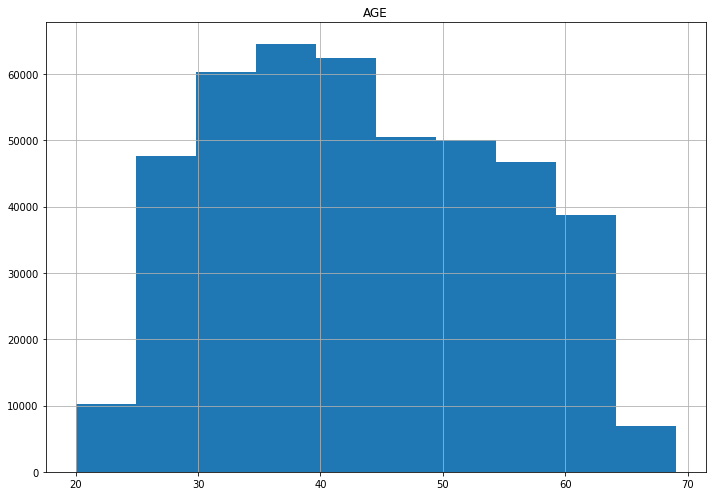

In [26]:
# Create Age based on DAYS_BIRTH.
app_rec['AGE'] = (app_rec['DAYS_BIRTH']/365).abs().apply(np.floor)
app_rec.hist(column='AGE');

In [27]:
# Create 8 different bucket of Ages
bins = [0, 20, 25,30,45,55,60, 65, 70]
labels = [1,2,3,4,5,6,7,8]
app_rec['AGE_BUKET'] = pd.cut(app_rec['AGE'], bins,labels=labels)
app_rec['AGE_BUKET']

0         4
1         4
2         6
3         5
4         5
         ..
438505    7
438506    4
438507    2
438508    6
438509    5
Name: AGE_BUKET, Length: 438510, dtype: category
Categories (8, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

In [28]:
# Create Count of Children bucket based on CNT_CHILDREN
app_rec.CNT_CHILDREN.value_counts()

0     304040
1      88518
2      39878
3       5429
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64

In [29]:
# # should be changed to number
# app_rec.CNT_CHILDREN_BUCKET = app_rec.CNT_CHILDREN
# def conditions(i): 
#     if i ==0 : return '0'
#     if i ==1 : return "1"
#     if i ==2 : return '2'
#     if i ==3 : return '3'
#     if i ==4 : return '4'
#     if i >= 5: return '5'

# app_rec['CNT_CHILDREN_BUCKET']=app_rec['CNT_CHILDREN'].apply(conditions)


# B - cre_rec Data Cleaning & Transforming

In [ ]:
print("Name of the columns:" ,cre_rec.columns)
print(cre_rec.shape)

In [ ]:
cre_rec.STATUS.unique()
# 0: 1-29 days past due 
# 1: 30-59 days past due 
# 2: 60-89 days overdue 
# 3: 90-119 days overdue 
# 4: 120-149 days overdue 
# 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month 
# X: No loan for the month

In [ ]:
gouped_id = cre_rec.groupby('ID')
pivot_tb = cre_rec.pivot(index="ID", columns='MONTHS_BALANCE', values= 'STATUS')
pivot_tb["Open_Month"] = gouped_id["MONTHS_BALANCE"].min()
pivot_tb['End_Month'] = gouped_id['MONTHS_BALANCE'].max()
pivot_tb['ID'] = pivot_tb.index
pivot_tb = pivot_tb[["ID","Open_Month","End_Month"]]
pivot_tb["window"] = pivot_tb["End_Month"] - pivot_tb["Open_Month"]
pivot_tb.reset_index(drop = True, inplace = True)

credit = pd.merge(cre_rec, pivot_tb, on = 'ID', how = 'left')

In [ ]:
pivot_tb

In [ ]:
credit = credit[credit['window'] > 20]

credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # analyze > 60 days past due 

credit['status'] = credit['status'].astype(np.int8)

credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['Open_Month'] # calculate month on book: how many months after opening account

credit.sort_values(by = ['ID','month_on_book'], inplace = True)

####
denominator = pivot_tb.groupby(["Open_Month"]).agg({"ID":['count']})
denominator.reset_index(inplace=True)
denominator.columns = ['open_month','sta_sum']

In [ ]:
vintage = credit.groupby(['Open_Month','month_on_book']).agg({'ID': ['count']}) 
vintage.reset_index(inplace = True)
vintage.columns = ['open_month','month_on_book','sta_sum'] 
vintage['due_count'] = np.nan
vintage = vintage[['open_month','month_on_book','due_count']] # delete aggerate column
vintage = pd.merge(vintage, denominator, on = ['open_month'], how = 'left') # join sta_sum colun to vintage table
vintage

In [ ]:
credit[credit["status"]==1]

In [ ]:
for j in range(-60,1):
    ls = []
    for i in range(0,60):
        due = list(credit[(credit["status"]==1) & (credit["month_on_book"]==i) & (credit["Open_Month"]==j)]["ID"])
        ls.extend(due)
        vintage.loc[(vintage['month_on_book']==i) & (vintage['open_month']==j), "due_account"] = len(set(ls))

In [ ]:
vintage

In [ ]:
cre_rec.sort_values(["ID","MONTHS_BALANCE"],ascending=False,    inplace=False).head(10).set_index('ID')

In [ ]:
#Transpose the credit record 

In [ ]:
cre_rec = pd.DataFrame(cre_rec.groupby(["ID","STATUS"])["STATUS"].count()).rename(columns={'STATUS': 'Freq'}).reset_index()

In [ ]:
cre_rec

In [ ]:
cre_rec.pivot(index="ID", columns='MONTHS_BALANCE', values= 'STATUS')

In [ ]:
cre_rec.loc[cre_rec["ID"]==5001711]

In [ ]:
cre_rec.groupby(by=["ID"])

In [ ]:
cre_rec.ID.duplicated().count()

In [ ]:
cre_rec.shape

In [ ]:
cre_rec.STATUS.value_counts()

# C - Merge the Data Sets

In [ ]:
data = pd.merge(app_rec,cre_rec)

In [ ]:
data

In [ ]:
# Merge 2 datasets based on the id

In [ ]:
#Save the Cleaned Data

# D - Model Development

In [ ]:
# Reload the Cleaned Data

In [ ]:
#Reload the Cleaned Data

In [ ]:
#Load Required librarys
import sklearn 

In [ ]:
#train model 1

In [ ]:
#Test model 1

In [ ]:
#evaluate model 1

In [ ]:
pwd

In [ ]:
# test 2 for my project

Misc

In [ ]:
# sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(10, 10)})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.boxplot( y=app_rec["AMT_INCOME_TOTAL"] )
ax.set(xlabel='Income', ylabel='Dollar Value')

